# Gathering Data
The first stage of this project is to gather 3 different sources of data:
- Manually download Twitter Archived Enhanced CSV file and read in data
- Download programatically Image Predictions TSV file from web server and read in data
- Use Twitter API to gather 'Likes' and 'Retweet' data for each tweet

#### Manually download Twitter Archived Enhanced CSV file and read in data


In [6]:
import pandas as pd

In [7]:
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [8]:
# check data read in correctly
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Download programatically Image Predictions TSV file from web server and read in data
To download this data I used the requests library as shown below:

In [9]:
# access and dpownload file
import requests 
url = r"https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [12]:
# write to file
with open("Image_Predictions.tsv", "wb") as file:
    file.write(response.content)

In [13]:
# read data into dataframe
df_image_predictions = pd.read_csv("Image_Predictions.tsv", sep = "\t")

In [14]:
# check data read in correctly
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Use Twitter API to gather 'Likes' and 'Retweet' data for each tweet


In [38]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [47]:
# check API is working
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)
    break

Police urge people to be vigilant following 5,000 spiking reports last year.
https://t.co/OAsgegI57G


In [48]:
# determine tweet_ids to iterate over
tweet_ids = df_twitter_archive["tweet_id"].copy()
tweet_ids.head()


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [56]:
import json
import time as time


deleted_tweet_ids = []

with open("tweet_json.txt","w") as file:
    
    for tweet_id in tweet_ids:
        
        start = time.time()
        
        try:
            
            # get tweet data
            tweet_data = api.get_status(tweet_id, tweet_mode="extended")
            
            # get tweet data as json
            tweet_json = tweet_data._json 
            
            # output json to file, then add new line to file
            json.dump(tweet_json, file)
            file.write("\n")
            
        except:
            
            # if tweet_id is missing append to list of deleted tweets
            print(str(tweet_id) + " not found")
            deleted_tweet_ids.append(tweet_id)
            
        end = time.time()
        print(end - start)
            

        
    

0.24831533432006836
1.3045711517333984
0.23944568634033203
0.21577191352844238
0.24812078475952148
0.24793457984924316
0.23248863220214844
0.2511136531829834
0.27791881561279297
0.22288846969604492
0.22980594635009766
0.25451111793518066
0.24520492553710938
0.26923584938049316
0.23783540725708008
1.3845624923706055
0.23429608345031738
0.2248241901397705
0.20174288749694824
888202515573088257 not found
0.23749542236328125
0.2372603416442871
0.19213032722473145
0.2477428913116455
0.2295701503753662
0.24902558326721191
0.22226691246032715
0.21996712684631348
0.22659659385681152
0.23643970489501953
0.46892547607421875
0.2328779697418213
0.21658968925476074
0.2337338924407959
0.2688405513763428
0.2305736541748047
0.20100855827331543
0.23619914054870605
0.23642778396606445
0.2443234920501709
0.23083138465881348
0.21916460990905762
0.21476435661315918
0.2322068214416504
0.24807381629943848
0.22268152236938477
0.22696924209594727
0.26369428634643555
1.1732285022735596
1.3003208637237549
0.2645

0.23832297325134277
0.25354433059692383
1.2573096752166748
0.25187182426452637
0.2192397117614746
0.24236345291137695
0.2597072124481201
1.2890660762786865
0.23944425582885742
1.3042938709259033
0.2519395351409912
2.8053107261657715
0.2550795078277588
0.31601715087890625
0.2912619113922119
0.1980733871459961
0.27719950675964355
1.261850118637085
0.25916552543640137
0.25652480125427246
1.3853511810302734
0.26466870307922363
0.2531468868255615
0.24130535125732422
1.2777044773101807
0.24017691612243652
0.22581005096435547
0.2206122875213623
0.21148228645324707
0.23057985305786133
0.2398519515991211
0.2354888916015625
0.24860525131225586
0.2603754997253418
0.22454619407653809
0.22688794136047363
0.24483180046081543
0.23784923553466797
0.24425649642944336
0.23078536987304688
0.21853899955749512
0.225142240524292
0.2206861972808838
0.2390446662902832
0.22946739196777344
0.22533488273620605
0.20793843269348145
0.25952935218811035
0.2536759376525879
0.23700761795043945
0.22155284881591797
0.23

1.3895659446716309
1.3917369842529297
0.2518503665924072
0.2663133144378662
1.2915244102478027
0.5245952606201172
0.2545592784881592
0.21722173690795898
0.24087977409362793
0.209442138671875
771004394259247104 not found
0.22526073455810547
0.22792458534240723
0.22592544555664062
770743923962707968 not found
0.22284340858459473
0.22495698928833008
0.22251200675964355
0.23380374908447266
0.24799513816833496
0.2303934097290039
0.24347376823425293
0.21107769012451172
0.238358736038208
0.24327516555786133
0.2767186164855957
0.23938894271850586
0.19472026824951172
0.2447507381439209
0.25929856300354004
0.2260279655456543
0.2500734329223633
0.19965624809265137
0.2283477783203125
0.22519707679748535
0.23170995712280273
0.2500326633453369
0.2372143268585205
766864461642756096 not found
0.17552542686462402
0.4764683246612549
0.27313661575317383
0.2159440517425537
0.2672903537750244
0.2526731491088867
0.35730624198913574
0.21929121017456055
0.20833992958068848
0.23573565483093262
1.28768897056579

Rate limit reached. Sleeping for: 137


140.18998074531555
0.355496883392334
0.2675740718841553
0.2534174919128418
0.2546730041503906
0.24789881706237793
0.26247406005859375
0.23262643814086914
0.24254417419433594
1.2394561767578125
1.4297857284545898
0.25899839401245117
1.3073928356170654
1.3741004467010498
0.2589998245239258
0.27443408966064453
0.25756001472473145
4.459499835968018
0.2552511692047119
0.5668435096740723
0.23057126998901367
0.2251124382019043
0.22969388961791992
0.23592042922973633
0.23617839813232422
0.22045302391052246
0.22010135650634766
0.22728610038757324
0.2512626647949219
0.24400591850280762
0.27237534523010254
0.23648571968078613
0.2188429832458496
754011816964026368 not found
0.19222164154052734
0.2590785026550293
0.22717690467834473
0.2549891471862793
0.23777198791503906
0.2489311695098877
0.19819402694702148
0.21790027618408203
0.24340534210205078
0.23393774032592773
0.22968697547912598
0.23782038688659668
0.2107710838317871
0.2903733253479004
0.231217622756958
1.3937618732452393
1.369309902191162

0.24291229248046875
0.22777652740478516
0.2293863296508789
0.20047998428344727
0.24582982063293457
0.25327491760253906
0.23459315299987793
0.22439146041870117
0.22440314292907715
0.24365806579589844
0.2277979850769043
0.22965407371520996
1.325049877166748
0.23606038093566895
0.2243211269378662
0.260265588760376
0.2447643280029297
0.22862792015075684
0.25156712532043457
0.2251567840576172
0.26502418518066406
0.2363264560699463
0.23085665702819824
0.22413134574890137
0.21303558349609375
0.21921658515930176
1.437765121459961
0.22698163986206055
0.22763824462890625
0.4869203567504883
2.4791669845581055
0.8298943042755127
0.7730004787445068
0.22706842422485352
0.301328182220459
0.2310316562652588
0.22769737243652344
0.24423456192016602
0.21986675262451172
0.19601011276245117
3.7949392795562744
0.24883770942687988
0.25127363204956055
0.23818373680114746
1.3091466426849365
0.24453234672546387
0.2258739471435547
0.3032364845275879
0.23233461380004883
1.3990108966827393
0.8251304626464844
0.757

0.21578049659729004
0.22441935539245605
0.19812774658203125
0.2151188850402832
0.4377286434173584
0.2111363410949707
0.2223961353302002
0.22011303901672363
0.23076891899108887
0.2021803855895996
0.2155287265777588
0.1959078311920166
0.21720290184020996
0.22335004806518555
0.2202749252319336
0.1994791030883789
0.22292113304138184
0.21631860733032227
0.22134160995483398
0.22327017784118652
0.21991443634033203
0.20499396324157715
0.21566104888916016
0.21662545204162598
0.21321582794189453
0.21393179893493652
0.20653009414672852
0.2143568992614746
0.24307632446289062
0.24120664596557617
0.23612213134765625
0.2533552646636963
0.19483494758605957
0.21130633354187012
0.21718311309814453
0.2094430923461914
0.22684693336486816
0.20830941200256348
0.2288835048675537
0.2127702236175537
0.21131062507629395
0.22554898262023926
0.2280101776123047
0.218428373336792
0.2354745864868164
0.22786283493041992
0.219773530960083
0.20525836944580078
0.2643568515777588
0.21847224235534668
0.22929859161376953
0

Rate limit reached. Sleeping for: 544


0.2669548988342285
546.6347184181213
0.24726653099060059
0.2501990795135498
0.2489933967590332
0.2517533302307129
0.22674226760864258
0.23390769958496094
0.2266995906829834
0.2763998508453369
0.23515081405639648
0.30548906326293945
0.23512649536132812
0.21346426010131836
0.2182929515838623
0.22669053077697754
0.26489782333374023
0.22392702102661133
0.21087265014648438
0.24573659896850586
0.22788739204406738
0.21704936027526855
0.20082926750183105
0.23878693580627441
0.24144768714904785
0.22299408912658691
0.23769164085388184
0.2018299102783203
0.21990728378295898
0.2412097454071045
0.2213430404663086
0.244828462600708
0.22344326972961426
0.22827458381652832
0.21826624870300293
0.22866392135620117
0.22458124160766602
0.2022712230682373
0.21278929710388184
0.23600053787231445
0.2722208499908447
0.2452242374420166
0.22387933731079102
0.22388601303100586
0.2198026180267334
0.21830105781555176
0.22649288177490234
0.22098731994628906
0.23571038246154785
0.19994497299194336
0.2308125495910644

0.23012304306030273
0.23892545700073242
0.2205181121826172
0.21590733528137207
0.2280588150024414
0.25614404678344727
0.24828624725341797
0.2328629493713379
0.234175443649292
0.23793506622314453
0.23022937774658203
0.21640682220458984
0.22371363639831543
0.22788786888122559
0.21809625625610352
0.2081599235534668
0.2451181411743164
0.19838213920593262
0.2226696014404297
0.22081613540649414
0.2388916015625
0.22721624374389648
0.20105862617492676
0.2028360366821289
0.22164344787597656
0.2187788486480713
0.22309350967407227
0.21454548835754395
0.18937087059020996
0.1985321044921875
0.2230517864227295
0.22130227088928223
0.21378564834594727
0.217482328414917
0.23570466041564941
0.20077943801879883
0.22718524932861328
0.20514369010925293
0.22154712677001953
0.25380516052246094
0.21794390678405762
0.20792579650878906
0.21893024444580078
0.23037958145141602
0.2100374698638916
0.24060940742492676
0.21659111976623535
0.20149493217468262
0.19947433471679688
0.23663878440856934
0.23557662963867188

In [58]:
# create empty list
json_data = []

# read file
with open("tweet_json.txt","r") as file:
    
    # iterate through each line
    for line in file:
        
        # convert line to dictionary and add to list
        json_data.append(json.loads(line))





In [60]:
# identify data to retrieve from first item in list
print(json_data[0]["id"])
print(json_data[0]["retweet_count"])
print(json_data[0]["favorite_count"])

892420643555336193
6879
32919


In [63]:
# create empty list to store data
json_data_retweets_favorites = []

# iterate through each item in list
for item in json_data:
    
    # add to list specific data, as dictionary
    json_data_retweets_favorites.append({
        "tweet_id": item["id"],
        "retweet_count": item["retweet_count"],
        "favorite_count": item["favorite_count"]
    })

In [65]:
# convert list of dicts to dataframe
df_retweets_favorites = pd.DataFrame(json_data_retweets_favorites)

In [66]:
# check data stored correctly
df_retweets_favorites

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6879,32919
1,892177421306343426,5180,28450
2,891815181378084864,3423,21375
3,891689557279858688,7087,35886
4,891327558926688256,7600,34323
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


# Assessing the data
We now have 3 dataframes to assess:
- df_twitter_archive
- df_image_predictions
- df_retweets_favorites

### Assessing df_twitter_archive

In [70]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None
1918,674271431610523648,NaN,NaN,2015-12-08 16:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/674271431...,10,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
549,805207613751304193,NaN,NaN,2016-12-04 00:30:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shooter. He's doing quite the snowy zo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805207613...,12,10,Shooter,None,None,None,None
1058,741793263812808706,NaN,NaN,2016-06-12 00:44:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your crush won't pay attention to you. Bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741793263...,10,10,None,None,None,None,None
623,796031486298386433,NaN,NaN,2016-11-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's here to make your day bet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796031486...,13,10,Daisy,None,None,None,None
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,None,None,None,None


#### From visual assessment:

##### Tidiness issues:
- Only 1 column needed for dog stage (i.e. doggo, floofer, pupper, puppo)

##### Quality issues:
- `rating_denominator` is 20 in 1 row. Expected vbalue is 10
- `Dog stage` values of "None" string should be replaced with Null
- Only want original tweets. Dataset includes data where `retweeted_status_id` is not null

In [71]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Quality issues:
- `tweet_id` is stored as integer type, but won't be used for calcs, should change to object type.
- `timestamp` is stored as object. Perhaps this should be stored as a more appropriate data type?
- `retweeted_status_id` has 181 non null values. Indicates 181 retweets to be removed
- `expanded_urls` has 2297 non nulls out of 2356 records. Therefore 59 records have no attached picture and will need to be removed.
- `retweeted_status_id` stored as float, but will not be used for calculations. Perhaps should be converted to object?
- `in_reply_to_status_id` stored as float, but will not be used for calculations. Perhaps should be converted to object?

In [72]:
df_twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

##### Quality issues:
- Looking at value counts, it appears some numerator values are incorrect. Perhaps values from 0-20 are correct?
- Excluding values above 20 will not signifcantly affect data size due to low volumes.

In [73]:
df_twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

##### Quality issues:
- small number of rows (23 rows) where denominator is not equal to 10
- Perhaps these values can be excluded as this will not signifcantly affect data size due to low volumes

In [74]:
df_twitter_archive["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

##### Quality issues:
- name value of "a" appears to be incorrect
- large number of cases where name is None. Perhaps name can be identified from text?

In [83]:
df_twitter_archive.groupby(["doggo","floofer","pupper","puppo"])["tweet_id"].count().reset_index()

,doggo,floofer,pupper,puppo,tweet_id
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


- Large number of cases where dog stage is not identified, perhaps this can be identified by text or some other means?
- 14 cases where 2 dog stages are present. Perhaps this can be concatinated?

### Assessing df_image_predictions

In [69]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old_English_sheepdog,0.765277,True,Bedlington_terrier,0.112753,True,Kerry_blue_terrier,0.047662,True


In [85]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
df_image_predictions["img_num"].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

Comments:
- Each entry has an image as expected
- Image number appears to be correct

##### Quality Issues:
- `tweet_id` is stored as integer type, but won't be used for calcs, should change to object type.

##### Tidiness issue:
- No need for this data to be a seperate dataframe. Can be joined to Twitter Archive data

## Assessing df_retweets_favorites

In [87]:
df_retweets_favorites.sample(10)

,tweet_id,retweet_count,favorite_count
1006,744971049620602880,2401,7149
916,752568224206688256,2056,5004
464,814638523311648768,2486,10432
1776,676916996760600576,1591,2641
1986,672160042234327040,301,751
1953,672902681409806336,417,1188
427,819015331746349057,17468,0
1401,697516214579523584,977,1837
1404,697270446429966336,1683,4257
1344,701952816642965504,913,3446


In [88]:
df_retweets_favorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


##### Quality issues:
- tweet_id is stored as integer type, but won't be used for calcs, should change to object type.

##### Tidiness issue:
- No need for this data to be a seperate dataframe. Can be joined to Twitter Archive data to create one master data set

# Cleaning the Data
Before cleaning the datasets, I will first create copies of each data set:

In [121]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_retweets_favorites_clean = df_retweets_favorites.copy()

### Cleaning 1 - Convert timestamp to datetime in Twitter Archive

##### Define
- Change datatype of `timestamp` from object to datetime

##### Code

In [122]:
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

#### Test

In [123]:
df_twitter_archive_clean.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### Cleaning 2 - Change Tweet ID data type to string 

#### Define
- change datatype of `tweet_id` from integer to string for each dataset

#### Code

In [124]:
df_twitter_archive_clean.tweet_id  = df_twitter_archive_clean.tweet_id.astype(str)
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)
df_retweets_favorites_clean.tweet_id = df_retweets_favorites_clean.tweet_id.astype(str)

#### Test

In [105]:
df_twitter_archive_clean.tweet_id.info()
df_image_predictions_clean.tweet_id.info()
df_retweets_favorites_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2325 entries, 0 to 2324
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2325 non-null   object
dtypes: object(1)
memory usage: 18.3+ KB


### Cleaning 3 - Remove All Retweets from Twitter Archive Data
#### Define
- Use `retweeted_status_id` to remove to exclude retweets
- Change `retweeted_status_id` to string datatype

##### Code

In [125]:
# exclude data where retweet_status_id is not null
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean["retweeted_status_id"].isnull()]

# change type to string
df_twitter_archive_clean.retweeted_status_id = df_twitter_archive_clean.retweeted_status_id.astype(str)

##### Test

In [110]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         2175 non-null   object             
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

## Cleaning 4 - Exclude data with missing expanded_urls
##### Define:
- Remove rows where `expanded_urls` is null 

##### Code

In [126]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean["expanded_urls"].notnull()]

##### Test

In [118]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2117 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2117 non-null   datetime64[ns, UTC]
 4   source                      2117 non-null   object             
 5   text                        2117 non-null   object             
 6   retweeted_status_id         2117 non-null   object             
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2117 non-null   int64           

## Cleaning 5 - Remove rows where rating_denominator does not equal 10          
##### Define
Exlude data where rating_denominator does not equal 10   

###### Code

In [132]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean["rating_denominator"]==10]

##### Test

In [135]:
df_twitter_archive_clean["rating_denominator"].value_counts()

10    2099
Name: rating_denominator, dtype: int64

## Cleaning 6 - Remove rows where rating_numerator is greater than 20

In [137]:
df_twitter_archive_clean["rating_numerator"].value_counts()

12      489
10      436
11      417
13      295
9       153
8        98
7        51
14       40
5        34
6        32
3        19
4        15
2         9
1         4
0         2
27        1
75        1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

After removing values where denominator does not equal 10, there still remains numerator values where the value is greater than 20. We will assume these are incorrect / typos and so these will be removed from the data set.
##### Define
Remove rows where `rating_numerator`is greater than 20

##### Code

In [140]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean["rating_numerator"] <= 20]

##### Test

In [141]:
df_twitter_archive_clean["rating_numerator"].value_counts()

12    489
10    436
11    417
13    295
9     153
8      98
7      51
14     40
5      34
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

## Cleaning 7 - Cleaning Dog names
##### Define
Replace name value where the name is "None" or "a" with a Null value

##### Code


In [156]:
df_twitter_archive_clean["name"] = df_twitter_archive_clean["name"].replace("None", None)
df_twitter_archive_clean["name"] = df_twitter_archive_clean["name"].replace("a", None)

##### Test

In [157]:
df_twitter_archive_clean["name"].value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 950, dtype: int64

## Cleaning 8 - Convert the 4 dog stages column to one single Dog Stage column
##### Define:
- Create a new column called dog_stage
- Populate dog_stage column with correct value
- Where there is more than one dog stage value, then concatonate values
- Where dog stage is "None" replace with Null
- Delete the columns "doggo", "floofer", "pupper", "puppo"

In [163]:
df_twitter_archive_clean.groupby(["doggo","floofer","pupper","puppo"])["tweet_id"].count().reset_index()

,doggo,floofer,pupper,puppo,tweet_id
0,None,None,None,None,1757
1,None,None,None,puppo,23
2,None,None,pupper,None,221
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


##### Code

In [166]:
df_twitter_archive_clean["doggo"].replace("None","",inplace=True)
df_twitter_archive_clean["floofer"].replace("None","",inplace=True)
df_twitter_archive_clean["pupper"].replace("None","",inplace=True)
df_twitter_archive_clean["puppo"].replace("None","",inplace=True)

In [175]:
df_twitter_archive_clean.groupby(["doggo","floofer","pupper","puppo"])["tweet_id"].count().reset_index()

,doggo,floofer,pupper,puppo,tweet_id
0,,,,,1757
1,,,,puppo,23
2,,,pupper,,221
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [180]:
# create new column called dog_stage
df_twitter_archive_clean["dog_stage"] = df_twitter_archive_clean["doggo"] + df_twitter_archive_clean["floofer"] + df_twitter_archive_clean["pupper"] + df_twitter_archive_clean["puppo"]

In [183]:
# replace empty string values with Nulls
df_twitter_archive_clean["dog_stage"].replace("", None, inplace=True)

In [185]:
# Delete previous columns
del df_twitter_archive_clean["doggo"]
del df_twitter_archive_clean["floofer"]
del df_twitter_archive_clean["pupper"]
del df_twitter_archive_clean["puppo"]

##### Test

In [184]:
# review values in new column dog_stage
df_twitter_archive_clean["dog_stage"].value_counts()

pupper          221
doggo            72
puppo            23
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [186]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   object             
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         2094 non-null   object             
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

## Cleaning 9 - Merge Twitter Archive Data to Image Predictions Data
##### Define
- Create a dataframe called df_master by merging the 2 dataframes df_twitter_archive_clean, df_image_predictions_clean by joining based on the tweet_id

##### Code

In [211]:
df_master = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on="tweet_id", how="left")

##### Test

In [212]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   object             
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         2094 non-null   object             
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

## Cleaning 10 - Merge Likes and Retweets Data to newly created Master dataset
##### Define
Merge the dataframe df_retweets_favorites_clean to df_master using the tweet_id

##### Code

In [213]:
df_master = pd.merge(df_master, df_retweets_favorites_clean, on="tweet_id", how="left")

##### Test

In [6]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                1432 non-null   object             
 8   dog_stage           337 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   float64            
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

## Cleaning 11 - Remove unnecessary columns from df_master
#### Define
Remove columns:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

##### Code

In [215]:
cols_to_delete = ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"]
df_master.drop(cols_to_delete, axis=1, inplace=True)

##### Test

In [216]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                1432 non-null   object             
 8   dog_stage           337 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   float64            
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

## Store df_master into a csv

In [217]:
df_master.to_csv("twitter_archive_master.csv", index=False)

## Analysing and Visualising Data

In [219]:
import seaborn as sns

### Analysis 1 - Favorite Count vs Rating

<AxesSubplot:xlabel='rating_numerator', ylabel='favorite_count'>

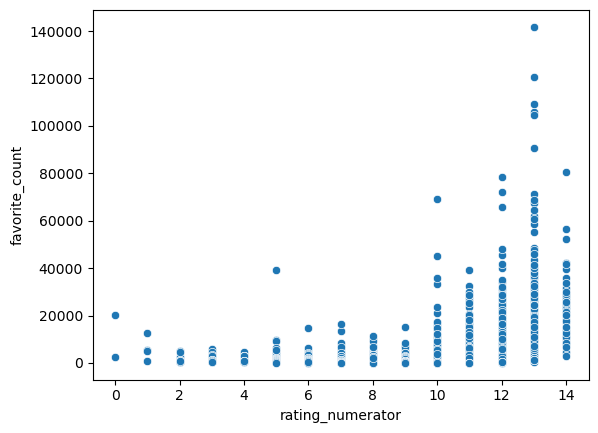

In [221]:
sns.scatterplot(data=df_master,x="rating_numerator",y="favorite_count")

I plot the favourite count against the rating number to see if there would be a correlation. As expected there does appear to be a trend. As the rating increases so does the number of favourites. This suggests that the higher the rating of the dog, the more favorites the tweet will likely get.
Next I'll plot the retweet count against the rating to see if there is a similiar trend.

### Analysis 2 - Retweets vs Rating

<AxesSubplot:xlabel='rating_numerator', ylabel='retweet_count'>

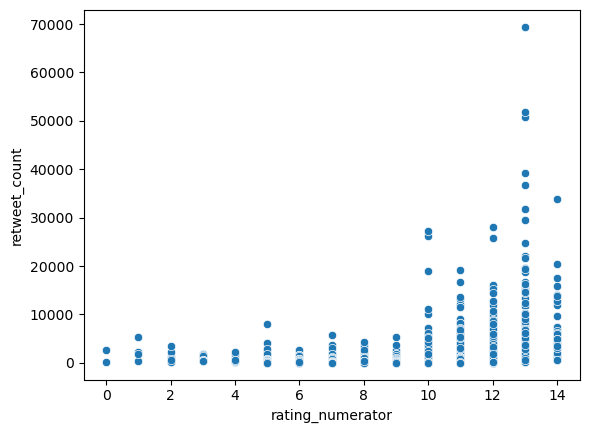

In [223]:
sns.scatterplot(data=df_master,x="rating_numerator",y="retweet_count")

Likewise to favorites vs rating, there does appear to be a positive correlation, suggesting that the higher the rating the more retweets the tweet will likely get.

### Analysis 3 - Retweets vs Favorites
I have a strong suspician that there will be a posistve correlation between the number of retweegts and number of favorites, so I plot the data, to see if this is indeed the case.

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

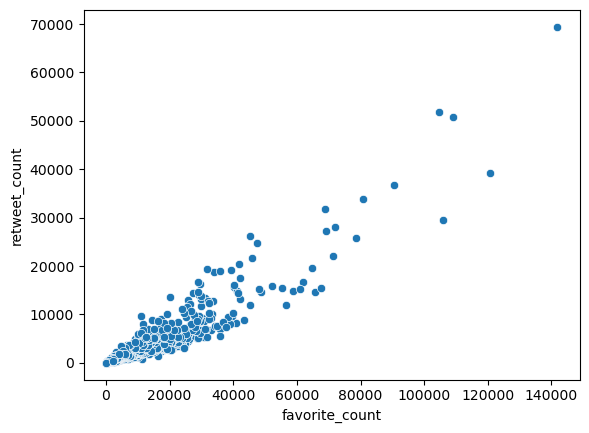

In [224]:
sns.scatterplot(data=df_master,x="favorite_count",y="retweet_count")

As expected, there does appear to be a strong correlation between the number of retweets and the number of favorites.

### Analysis 4 - Most favorited Dog stage
I'm quite curious to see if there is any particular dog stage which gets more favorites than others.
So first, I will group the data by the dog stage, and then calculate the mean favorite count.
I will then plot this data against a bar plot to see the results.


In [49]:
df_dog_stage_fav_count = df_master.groupby("dog_stage")["favorite_count"].mean().reset_index().rename(columns={"favorite_count": "avg_favorite_count"})

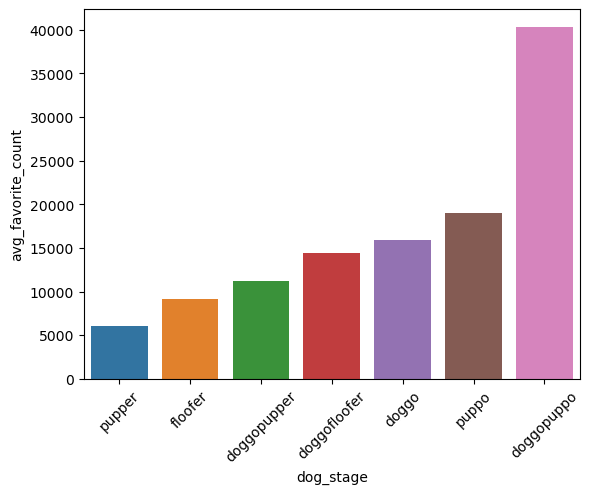

In [53]:
fav = sns.barplot(data=df_dog_stage_fav_count.sort_values('avg_favorite_count'), x="dog_stage",y="avg_favorite_count")
for item in fav.get_xticklabels():
    item.set_rotation(45)

In [35]:
df_master['dog_stage'].value_counts().to_frame()

,dog_stage
pupper,221
doggo,72
puppo,23
doggopupper,10
floofer,9
doggopuppo,1
doggofloofer,1


From the barplots it seems as though doggopuppo is the most favorited dog type. However, it is important to note that there was only 1 dog identified as a doggopuppo and so this may not be a good representation of the data, due to the small sample size for this dog type.
Looking at the data the dog type pupper appears to be the least favorited dog type, whilst puppo seems to be the most favorited. 

### Analysis 5 - Most Popular Dog Names 
To determine the most popular dog names from this dataset I will groupby the name, then count the number of tweetIDs per name

In [62]:
df_master.groupby("name")["tweet_id"].count().to_frame().rename(columns={"tweet_id": "count"}).sort_values('count', ascending=False)

,count
name,
Charlie,11
Lucy,11
Cooper,10
Oliver,10
Penny,9
...,...
Keet,1
Canela,1
Kellogg,1


We can see that Charlie and Lucy are the most popular dog names, followed by Cooper and Oliver